In [17]:
#imports
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage import color
from skimage import morphology
from skimage import segmentation
from skimage import util
from skimage import transform

## !! FIND A WAY TO IMPORT PHOTOS EASIER !!

In [15]:
#Load image
image = io.imread('/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/cancer/BCC/PAT_875_1668_588.png')
image.shape

(635, 635, 4)

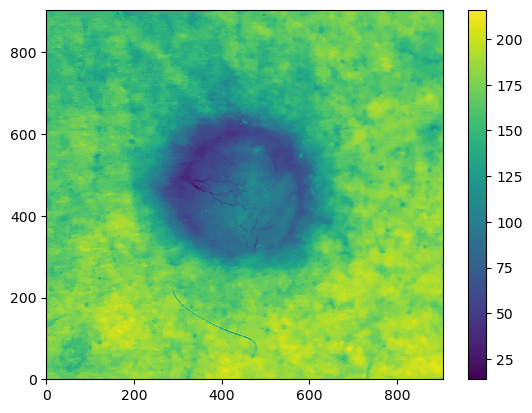

In [4]:
plt.pcolormesh(image[:,:,1])
plt.colorbar()

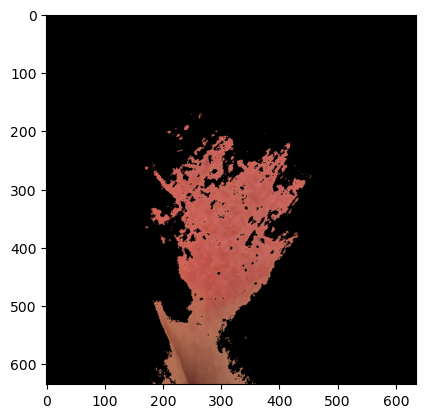

In [16]:
# Remove the alpha channel
if image.shape[-1] == 4:
    image = image[..., :3]

# Convert the image to grayscale
image_gray = color.rgb2gray(image)

# Create a binary mask
mask = image_gray < 0.5

# Apply the mask to the image
image_masked = image.copy()
image_masked[~mask] = 0

# Display the masked image
plt.imshow(image_masked)
plt.show()

## !!! NEEDS TO BE FIXED !!!

idk whats wrong with it :((

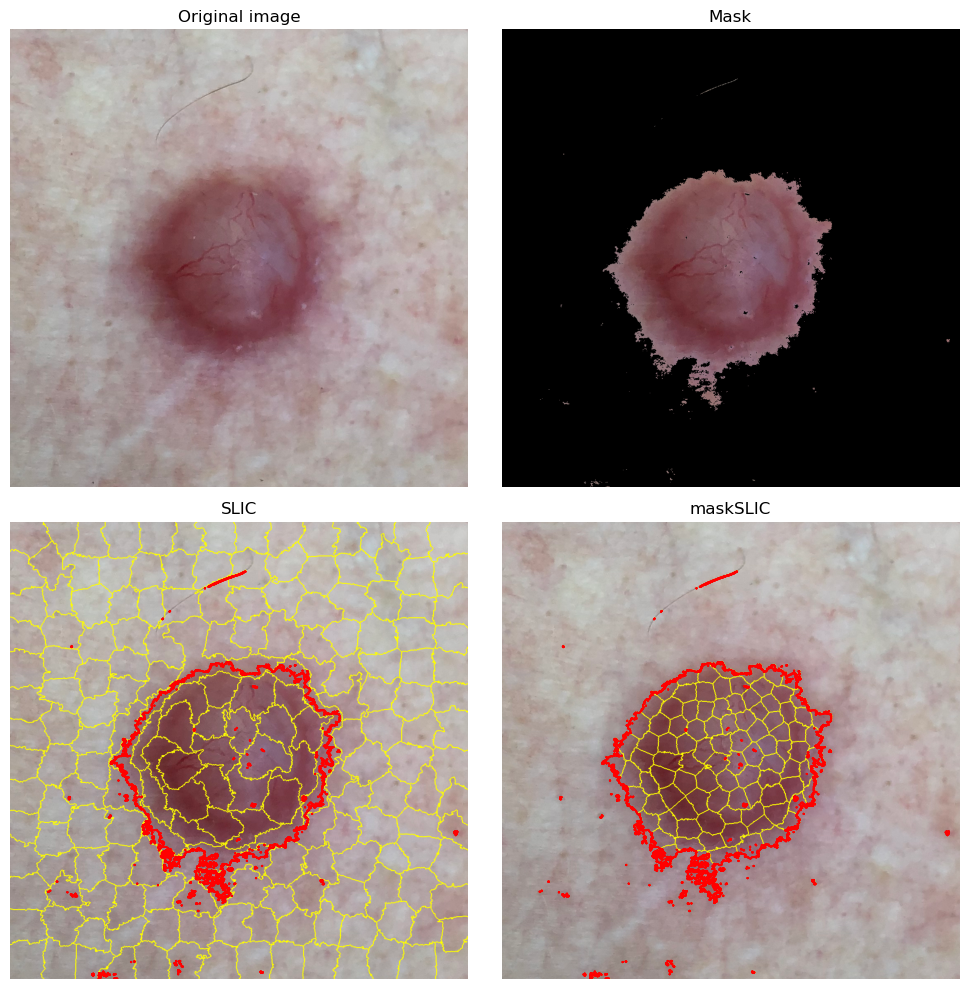

In [6]:
# Input data
if image.shape[-1] == 4:
    image = image[..., :3]

# Compute a mask
# lum = color.rgb2gray(image)
# mask = morphology.remove_small_holes(
#     morphology.remove_small_objects(
#         lum < 0.7, 500),
#     500)

# mask = morphology.opening(mask, morphology.disk(3))

# Convert the image to grayscale
image_gray = color.rgb2gray(image)

# Create a binary mask
mask = image_gray < 0.5

# Apply the mask to the image
image_masked = image.copy()
image_masked[~mask] = 0

# SLIC result
slic = segmentation.slic(image, n_segments=200, start_label=1)

# maskSLIC result
m_slic = segmentation.slic(image, n_segments=100, mask=mask, start_label=1)

# Display result
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(image)
ax1.set_title('Original image')

ax2.imshow(image_masked, cmap='gray')
ax2.set_title('Mask')

ax3.imshow(segmentation.mark_boundaries(image, slic))
ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title('SLIC')

ax4.imshow(segmentation.mark_boundaries(image, m_slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title('maskSLIC')

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()

#### Image resizing testing

In [18]:
# Define the target size
target_size = (256, 256)

# Set the path to the folder containing the images
folder_path = '/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_photos'

folder_path_out = '/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_foto_res'

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# Loop over the image file names and resize each image
for filename in image_files:
    # Load the image from file
    image = io.imread(os.path.join(folder_path, filename))
    
    # Resize the image to the target size
    resized_image = transform.resize(image, target_size)
    
    # Save the resized image to file
    io.imsave(os.path.join(folder_path_out, 'resized_' + filename), resized_image)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [5]:
folder_path_masked = '/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/cancer/BCC_res'

image_files = [f for f in os.listdir(folder_path_masked) if f.endswith('.png')]

for filename in image_files:
    # Load the image from file
    image = io.imread(os.path.join(folder_path_masked, filename))
    
    # Remove the alpha channel
    if image.shape[-1] == 4:
        image = image[..., :3]

    # Convert the image to grayscale
    image_gray = color.rgb2gray(image)

    # Create a binary mask
    mask = image_gray < 0.5

    # Apply the mask to the image
    image_masked = image.copy()
    image_masked[~mask] = 0
    
    # Save the resized image to file
    io.imsave(os.path.join(folder_path_masked, 'masked_' + filename), image_masked)

#### Irregular streaks - spikes on the border

/var/folders/kk/clfnz3112wx7t9472q8t_bc80000gn/T/ipykernel_52457/3575112553.py:19: FutureWarning: `selem` is a deprecated argument name for `binary_opening`. It will be removed in version 1.0. Please use `footprint` instead.
  opened_image = morphology.binary_opening(binary, selem=morphology.disk(5))


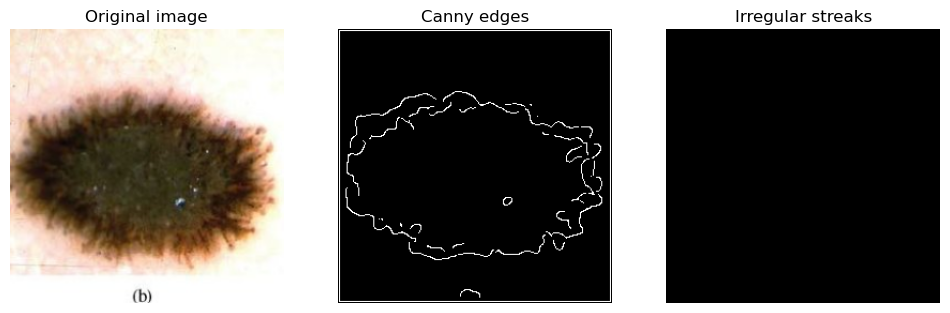

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, feature, filters, morphology, measure

# Load the image
image = io.imread('/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_foto_res/resized_point5_2.png')

# Convert to grayscale
gray = io.imread('/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_foto_res/resized_point5_2.png', as_gray=True)

# Apply Canny edge detector
edges = feature.canny(gray, sigma=3)

# Threshold the edges
thresh = filters.threshold_otsu(edges)
binary = edges > thresh

# Remove small objects
opened_image = morphology.binary_opening(binary, selem=morphology.disk(5))

# Extract the irregular streaks feature
label_image = morphology.label(opened_image)
props = measure.regionprops(label_image)
irregular_streaks = np.zeros_like(binary)
for prop in props:
    if prop.area > 1000 and prop.perimeter > 500:
        irregular_streaks += (label_image == prop.label)

# Display the results
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
ax[0].imshow(image)
ax[1].imshow(edges, cmap='gray')
ax[2].imshow(irregular_streaks, cmap='gray')
ax[0].set_title('Original image')
ax[1].set_title('Canny edges')
ax[2].set_title('Irregular streaks')
for a in ax:
    a.axis('off')
plt.show()


In [1]:
import cv2
import numpy as np

# Load the skin lesion image and convert it to grayscale
img = cv2.imread('/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_foto_res/resized_point7_2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a smoothing filter to reduce noise and enhance structure
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Apply a threshold to segment the lesion from the background
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply a morphological closing operation to fill gaps and holes in the lesion
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Apply a distance transform to compute the Euclidean distance to the background
dist_transform = cv2.distanceTransform(closed, cv2.DIST_L2, 3)

# Threshold the distance transform to highlight areas of regression structures
_, reg_thresh = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)

# Apply morphological dilation to expand areas of regression structures and connect segments
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
dilated = cv2.dilate(reg_thresh, kernel)

# Multiply the dilated binary image with the original grayscale image to obtain the final segmentation
reg_seg = np.multiply(dilated, gray)

# Compute features of regression structures
# e.g., size, shape, texture, etc.

# Display the result
cv2.imshow('Regression Structures', reg_seg)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops

# Load the skin lesion image and convert it to grayscale
img = cv2.imread('/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_foto_res/resized_point7.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a smoothing filter to reduce noise and enhance structure
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Apply a threshold to segment the lesion from the background
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply a morphological closing operation to fill gaps and holes in the lesion
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Apply a distance transform to compute the Euclidean distance to the background
dist_transform = cv2.distanceTransform(closed, cv2.DIST_L2, 3)

# Threshold the distance transform to highlight areas of regression structures
_, reg_thresh = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)

# Apply morphological dilation to expand areas of regression structures and connect segments
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
dilated = cv2.dilate(reg_thresh, kernel)

# Multiply the dilated binary image with the original grayscale image to obtain the final segmentation
reg_seg = np.multiply(dilated, gray)

# Compute features of regression structures

# Size
reg_size = np.sum(reg_thresh) / 255  # Total number of pixels in the regression structures

# Shape
contours, _ = cv2.findContours(reg_thresh.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]  # Assuming there is only one contour
reg_area = cv2.contourArea(contour)
reg_perimeter = cv2.arcLength(contour, True)
reg_circularity = 4 * np.pi * reg_area / (reg_perimeter ** 2)  # Circular shape if close to 1
(x, y), (MA, ma), angle = cv2.fitEllipse(contour)
reg_eccentricity = np.sqrt(1 - (ma / MA) ** 2)  # More elongated if close to 1

# Texture
glcm = greycomatrix(reg_seg, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)
reg_contrast = greycoprops(glcm, 'contrast').mean()
reg_homogeneity = greycoprops(glcm, 'homogeneity').mean()

# Intensity
reg_intensity = np.max(reg_seg)

# Gradient
sobelx = cv2.Sobel(reg_seg, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(reg_seg, cv2.CV_64F, 0, 1, ksize=3)
reg_gradient_mag = np.sqrt(sobelx ** 2 + sobely ** 2)
reg_gradient_orient = np.arctan2(sobely, sobelx).mean()

# Display the features
print("Regression Structures Features:")
print("Size:", reg_size)
print("Circularity:", reg_circularity)
print("Eccentricity:", reg_eccentricity)
print("Contrast:", reg_contrast)
print("Homogeneity:", reg_homogeneity)
print("Intensity:", reg_intensity)
print("Gradient Magnitude:", reg_gradient_mag.mean())
print("Gradient Orientation:", reg_gradient_orient)


/var/folders/kk/clfnz3112wx7t9472q8t_bc80000gn/T/ipykernel_37458/1391440104.py:44: RuntimeWarning: invalid value encountered in sqrt
  reg_eccentricity = np.sqrt(1 - (ma / MA) ** 2)  # More elongated if close to 1
/Users/bogdancristianmihaila/opt/anaconda3/lib/python3.9/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')


ValueError: Float images are not supported by graycomatrix. Convert the image to an unsigned integer type.

Better irregular streaks?

In [ ]:
from skimage import io
from skimage.filters import threshold_otsu
import os
from skimage.color import rgb2gray
from skimage import util


folder_path = "C:/Users/annam/Desktop/Globules/Resized"
image_path = "C:/Users/annam/Desktop/Globules/Resized/images.jpg"
filename = "images.jpg"

image = io.imread(os.path.join(folder_path, filename))
grayscale = rgb2gray(image)

thresh = threshold_otsu(grayscale)
binary = grayscale > thresh

### DO NOT USE MATPLOTLIB FOR PLOTTING ###
# io.imshow(binary)
# io.show()



inverted_img = util.invert(binary)

io.imshow(inverted_img)
io.show()

339
Border pixels 339
Streak pixels 0
0.0
No irregular streaks detected.


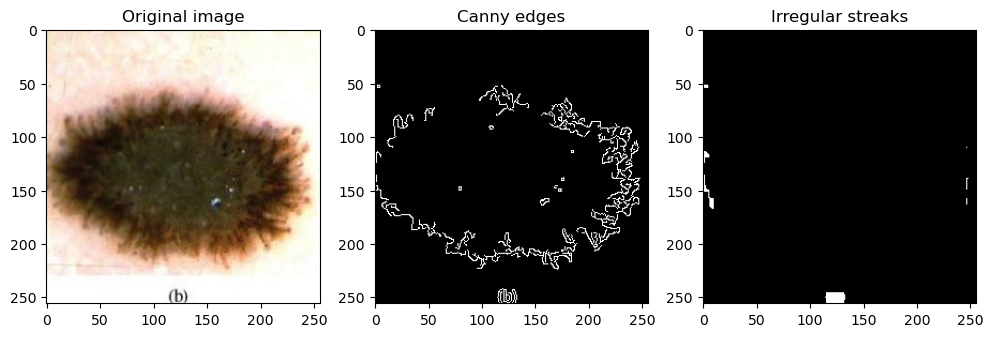

In [29]:
import cv2
import numpy as np
#np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt

# Load the skin lesion image
img = cv2.imread('/Users/bogdancristianmihaila/Desktop/2nd Semester/Github/project2/Project-2-Medical-Imaging/data/images/test_foto_res/resized_point5_2.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection to extract edges
edges = cv2.Canny(gray, 75, 200) # increase second parameter to detect more edges, increase third argument for less edges detected 

# Apply thresholding to extract irregular streaks on the borders
_, thresh = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((5,5), np.uint8)
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
border_mask = np.zeros_like(thresh)
border_mask[:10, :] = 1 #You can adjust the size of the border mask by changing the size of the slices used to assign 1 to the border mask.
border_mask[-10:, :] = 1
border_mask[:, :10] = 1
border_mask[:, -10:] = 1
border = cv2.bitwise_and(thresh, border_mask)
print(np.sum(border))
# Compute the percentage of pixels in the border that belong to irregular streaks
border_pixels = np.sum(border != 0)
streak_pixels = np.sum(border == 255)
streak_percentage = streak_pixels / border_pixels
print("Border pixels", border_pixels)
print("Streak pixels", streak_pixels)
print(streak_percentage)
# Display the result
if streak_percentage > 1: #values between 1 and 0.01 since is a %. You can adjust this value to make the detection more or less sensitive, depending on the characteristics of your images.
    print("Irregular streaks detected!")
    output = 1
else:
    print("No irregular streaks detected.")
    output = 0

# Plot the images
fig, ax = plt.subplots(1, 3, figsize=(12, 6))
ax[0].imshow(img[:,:,::-1])
ax[0].set_title("Original image")
ax[1].imshow(edges, cmap='gray')
ax[1].set_title("Canny edges")
ax[2].imshow(border, cmap='gray')
ax[2].set_title("Irregular streaks")
plt.show()
